# Logistics Regression

**Import Libraries**

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sns.set()

**Load the data**

In [198]:
data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# data with features
X = data.data

# data class labels
y = data.target

**Print the number of data points, number of features and number of classes in the given data set.**

In [199]:
print(f'Number of data points = {data.data.shape[0]}')
print(f'Number of features = {len(data.feature_names)}')
print(f'Number of classes = {len(data.target_names)}')

Number of data points = 569
Number of features = 30
Number of classes = 2


**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [201]:
def getShape(name, dataset):
  print(f'Shape of {name} is {dataset.shape[0]} * {dataset.shape[1]}')

getShape('X', X)
getShape('X_train', X_train)
getShape('X_test', X_test)

Shape of X is 569 * 30
Shape of X_train is 455 * 30
Shape of X_test is 114 * 30


**Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler().**

In [202]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Implement Logistic Regression Using Gradient Descent: without using sklearn.**


In this algorithm, $n$ is the total number of datapoints in dataset. 
$\alpha$ is the learning rate to be used in gradient descent. For this work, just fix $\alpha = 0.001$.

The predicted value for data point $x$ is $y_{pred} = σ(w^{T}x + b)$, where $σ$ is a sigmoid function.

**ALGORITHM:**

<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each y_{true},y_{pred}}(y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred}))$
- for each epoch:

    - for each data point say $x_{i}$ in train:

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = \frac{1}{n}(x_i(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>)

           $ db^{(t)} = \frac{1}{n}(σ((w^{(t)})^{T} x_i+b^{t}) - y_i))$

        - Update weights and intercept using gradient descent  <br>
        $w^{(t+1)}← w^{(t)} - α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)} - α(db^{(t)}) $
    - predict the output for all test data points with updated weights. (write your function in def prediction())
    - calculate the log loss for train and test data points separately with the updated weights. Store these losses in the lists, train_loss and test_loss.
    - And if you wish, you can compare the previous train loss and the current train loss, if it is not updating, then
        you can stop the training
    -return the updated weights, training and test loss lists.


In [203]:
def logloss(y_true, y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    sum_ind = 0

    for i in range(len(y_true)):
      sum_ind += (y_true[i] * np.log(y_pred[i]) + (1 - y_true[i]) * np.log(1 - y_pred[i]))
    
    logloss = (-1) * ( 1 / len(y_true) ) * sum_ind

    return logloss

In [204]:
def initialize_weights(inVec):
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of input vector.
    weights = np.zeros_like(inVec)

    #initialize bias to zero
    bias = 0

    return weights, bias

In [205]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1 / (1 + np.exp(-z))

In [206]:
# w should be a vector of size as input data point. Size of w and dw be same.
def gradient_dw(x, y, w, b, n):
  # In this function, we will compute the gradient w.r.to w
  dw = (1/n) * x * ( sigmoid(np.dot(w, x) + b) - y)

  return dw    

In [207]:
#b should be a scalar value
def gradient_db(x, y, w, b, n):
  # In this function, we will compute gradient w.r.to b 
  db = (1/n) * ( sigmoid(np.dot(w, x) + b) - y )

  return db

**For the prediction, if activation_value > 0.5 then assign label = 1 else label = 0**

In [208]:
def getPredictions(y_true, y_pred):
  true_pos = 0

  for i in range(len(y_true)):
    if y_pred[i] > 0.5:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

    if y_true[i] == y_pred[i]:
      true_pos += 1

  return true_pos, round((true_pos/len(y_true)) * 100, 2)

In [209]:
def predict(w, b, X):
  n = len(X)
  z = np.dot(w, X) + b

  return sigmoid(z)

In [210]:
def logistic_regression(X_train, y_train, X_test, y_test, epochs, lr):
  # implement your algorithm
  weights, bias = initialize_weights(X_train[0])

  train_loss = []
  test_loss = []
  train_true_pos = []
  test_true_pos = []
  train_acc = []
  test_acc = []
  epoch_list = []
  n = len(X_train)

  loss_last = -1

  for epoch in range(epochs): # Running epochs for training
    for batch in range(n):
      # Finding differentiations against weight and bias 
      dw = gradient_dw(X_train[batch], y_train[batch], weights, bias, n)
      db = gradient_db(X_train[batch], y_train[batch], weights, bias, n)

      # Changing weights and biases as per differences calculated above
      weights -= lr * dw
      bias -= lr * db

    train_predict, test_predict = [], []

    for batch in range(len(X_train)):
      train_predict.append( predict(weights, bias, X_train[batch]) )
    
    for batch in range(len(X_test)):
      test_predict.append( predict(weights, bias, X_test[batch]) )

    curr_train_loss = logloss(y_train, train_predict)

    if curr_train_loss == loss_last or curr_train_loss==1:
      break
    else:
      epoch+=1
      epoch_list.append(epoch)

      loss_last = curr_train_loss
      train_loss.append( curr_train_loss )
      test_loss.append( logloss(y_test, test_predict) )

      train_pred, train_accuracy = getPredictions(y_train, train_predict)
      train_true_pos.append(f'{train_pred}')
      train_acc.append(train_accuracy)

      test_correct_pred, test_accuracy = getPredictions(y_test, test_predict)
      test_true_pos.append(f'{test_correct_pred}')
      test_acc.append(test_accuracy)

  results = pd.DataFrame({ "Epochs": epoch_list,
                           "Train Loss": train_loss,
                           "Test Loss": test_loss,
                           "Train Accuracy": train_acc,
                           "Test Accuracy": test_acc })
  
  return results, weights, bias

**Plot your train and test loss vs epochs. Plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging**

In [211]:
epochs = 100
learning_rate = 0.00001

main_results, weights, bias = logistic_regression(X_train, y_train, X_test, y_test, epochs, learning_rate)

In [212]:
main_results

,Epochs,Train Loss,Test Loss,Train Accuracy,Test Accuracy
0,1,0.693127,0.693128,93.85,90.35
1,2,0.693106,0.693108,93.85,90.35
2,3,0.693086,0.693089,93.85,90.35
3,4,0.693065,0.693070,93.85,90.35
4,5,0.693045,0.693050,93.85,90.35
...,...,...,...,...,...
95,96,0.691189,0.691290,93.85,90.35
96,97,0.691168,0.691270,93.85,90.35
97,98,0.691148,0.691251,93.85,90.35
98,99,0.691128,0.691232,93.85,90.35


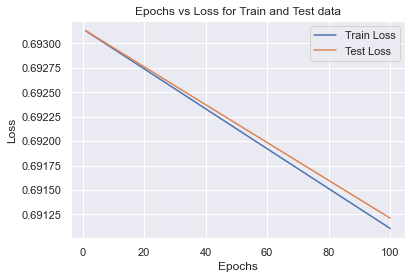

In [213]:
main_results.plot(x='Epochs', y=['Train Loss', 'Test Loss'], kind="line")
plt.ylabel('Loss')
plt.title('Epochs vs Loss for Train and Test data')
plt.show()

**Compute the final accuracy on test dataset.**

In [214]:
def getTestAccuracy(weights, bias, X_test, y_test):
  n = len(X_test)
  
  y_pred = []

  for batch in range(n):
    y_pred.append( predict(weights, bias, X_test[batch]) )
  
  correct_preds, accuracy = getPredictions(y_test, y_pred)

  return correct_preds, accuracy

In [215]:
correct_preds, accuracy = getTestAccuracy(weights, bias, X_test, y_test)

print(f'For Test Dataset:')
print(f'    Accuracy = {accuracy} %')
print(f'    Correct Predictions = {correct_preds}/{len(X_test)}')

For Test Dataset:
    Accuracy = 90.35 %
    Correct Predictions = 103/114


**BONUS: Train your model with varying values of learning rates say ranging in $[0.1, 0.01, 0.001, 0.0001]$ and plot the performances.**

In [216]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

0     0.540370
1     0.452676
2     0.396155
3     0.356426
4     0.326754
        ...   
95    0.100040
96    0.099700
97    0.099365
98    0.099036
99    0.098712
Name: Train Loss, Length: 100, dtype: float64
0     0.673317
1     0.654717
2     0.637263
3     0.620871
4     0.605464
        ...   
95    0.249641
96    0.248545
97    0.247465
98    0.246400
99    0.245349
Name: Train Loss, Length: 100, dtype: float64
0     0.691107
1     0.689080
2     0.687066
3     0.685065
4     0.683077
        ...   
95    0.545341
96    0.544202
97    0.543068
98    0.541941
99    0.540820
Name: Train Loss, Length: 100, dtype: float64
0     0.692943
1     0.692738
2     0.692534
3     0.692330
4     0.692126
        ...   
95    0.674094
96    0.673901
97    0.673709
98    0.673517
99    0.673325
Name: Train Loss, Length: 100, dtype: float64


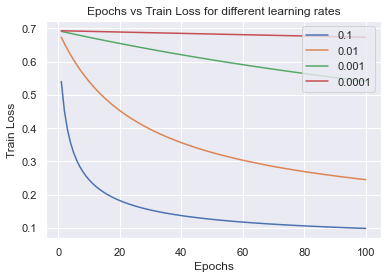

In [217]:
for curr_learning_rate in learning_rates:
  results, weights, bias = logistic_regression(X_train, y_train, X_test, y_test, epochs, curr_learning_rate)
  print(results['Train Loss'])
  plt.plot(results['Epochs'].to_numpy(), results['Train Loss'].to_numpy())

plt.legend([str(i) for i in learning_rates], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Epochs vs Train Loss for different learning rates')
plt.show()

0     0.549519
1     0.467568
2     0.414485
3     0.376954
4     0.348784
        ...   
95    0.127685
96    0.127340
97    0.127000
98    0.126666
99    0.126337
Name: Test Loss, Length: 100, dtype: float64
0     0.674360
1     0.656781
2     0.640322
3     0.624899
4     0.610429
        ...   
95    0.274937
96    0.273881
97    0.272840
98    0.271813
99    0.270800
Name: Test Loss, Length: 100, dtype: float64
0     0.691212
1     0.689290
2     0.687381
3     0.685485
4     0.683601
        ...   
95    0.554160
96    0.553095
97    0.552036
98    0.550983
99    0.549936
Name: Test Loss, Length: 100, dtype: float64
0     0.692953
1     0.692759
2     0.692565
3     0.692372
4     0.692178
        ...   
95    0.675095
96    0.674913
97    0.674731
98    0.674549
99    0.674367
Name: Test Loss, Length: 100, dtype: float64


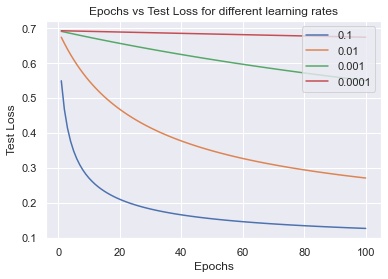

In [218]:
for curr_learning_rate in learning_rates:
  results, weights, bias = logistic_regression(X_train, y_train, X_test, y_test, epochs, curr_learning_rate)
  print(results['Test Loss'])
  plt.plot(results['Epochs'].to_numpy(), results['Test Loss'].to_numpy())

plt.legend([str(i) for i in learning_rates], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Epochs vs Test Loss for different learning rates')
plt.show()